In [1]:
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
seed = 0
np.random.seed(seed)
import tensorflow as tf
tf.random.set_seed(seed)
import os
os.environ['PATH'] = '/opt/Xilinx/Vivado/2019.2/bin:' + os.environ['PATH']

2022-05-02 18:35:44.802274: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-02 18:35:44.802310: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
x_test_em_barrel = np.load('x_test_em_barrel.npy')
x_train_em_barrel = np.load('x_train_em_barrel.npy')
y_train_targets = np.load('y_train_targets.npy')
y_test_targets = np.load('y_test_targets.npy')

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Nadam
from tensorflow.keras.regularizers import l1
from callbacks import all_callbacks
from tensorflow.keras.layers import Activation
from qkeras.qlayers import QDense, QActivation
from qkeras.quantizers import quantized_bits, quantized_relu
from qkeras import QActivation
from qkeras import QDense, QConv2DBatchnorm
from tensorflow.keras.callbacks import TensorBoard

In [4]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.regularizers import l1
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LeakyReLU

In [102]:
input1 = Input(shape=(56, 11, 4), name='em_barrel')
x1 = UpSampling2D(size=(1, 5), interpolation='nearest',
                    data_format='channels_last', name='up_sampling')(input1)
x2 = BatchNormalization(name='batch_norm',epsilon=25)(x1)
x2 = Conv2D(16, kernel_size=(5,5), strides=(1,1), kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001), use_bias=False,
               name='conv', padding='same')(x2) 
x3 = BatchNormalization(name='batch_norm_1')(x2)
x4 = LeakyReLU(alpha = 0.30000001192092896, name='leaky_relu')(x3)
x5 = MaxPooling2D((2,2), name='max_pooling2D')(x4)
x6 = Conv2D(32, kernel_size=(3,3), strides=(1,1), kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001), use_bias=False,
               name='conv_1', padding='same')(x5) 
x6 = BatchNormalization(name='batch_norm_2')(x6)
x7 = LeakyReLU(alpha = 0.30000001192092896, name='leaky_relu_1')(x6)
x8 = Conv2D(32, kernel_size=(3,3), strides=(1,1), kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001), use_bias=False,
               name='conv_2', padding='same')(x7) 
x8 = BatchNormalization(name='batch_norm_3')(x8)
x9 = LeakyReLU(alpha = 0.30000001192092896, name='leaky_relu_2')(x8)
x10 = MaxPooling2D((2,2), name='max_pooling2D_1')(x9)
x11 = Conv2D(64, kernel_size=(3,3), strides=(1,1), kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001), use_bias=False,
               name='conv_3', padding='same')(x10)
x11 = BatchNormalization(name='batch_norm_4')(x11)
x12 = LeakyReLU(alpha = 0.30000001192092896, name='leaky_relu_3')(x11)
x13 = Conv2D(64, kernel_size=(3,3), strides=(1,1), kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001), use_bias=False,
               name='conv_4', padding='same')(x12) 
x13 = BatchNormalization(name='batch_norm_5')(x13)
x14 = LeakyReLU(alpha = 0.30000001192092896, name='leaky_relu_4')(x13)
x15 = MaxPooling2D((2,2), name='max_pooling2D_2')(x14)
x16 = Conv2D(128, kernel_size=(3,3), strides=(1,1), kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001), use_bias=False,
               name='conv_5', padding='same')(x15) 
x16 = BatchNormalization(name='batch_norm_6')(x16)
x17 = LeakyReLU(alpha = 0.30000001192092896, name='leaky_relu_5')(x16)
x18 = Conv2D(128, kernel_size=(3,3), strides=(1,1), kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001), use_bias=False,
               name='conv_6', padding='same')(x17) 
x18 = BatchNormalization(name='batch_norm_7')(x18)
x19 = LeakyReLU(alpha = 0.30000001192092896, name='leaky_relu_6')(x18)
x20 = MaxPooling2D((2,2), name='max_pooling2D_3')(x19)
x21 = Conv2D(256, kernel_size=(3,3), strides=(1,1), kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001), use_bias=False,
               name='conv_7', padding='same')(x20) 
x21 = BatchNormalization(name='batch_norm_8')(x21)
x22 = LeakyReLU(alpha = 0.30000001192092896, name='leaky_relu_7')(x21)
x23 = QConv2DBatchnorm(256, kernel_size=(3,3), strides=(1,1),
                         kernel_quantizer="quantized_bits(16,4,alpha=1)", 
                         bias_quantizer="quantized_bits(16,4,alpha=1)",
                         kernel_initializer='lecun_uniform', 
                         kernel_regularizer=l1(0.0001), 
                         use_bias=True,
                         padding='same',
                         name='conv2d_batchnorm_8')(x22)
x24 = LeakyReLU(alpha = 0.30000001192092896, name='leaky_relu_8')(x23)
x25 = Flatten(name='flatten')(x24)
x26 = Dense(256, name='dense', #kernel_quantizer=quantized_bits(32,16,alpha='auto_po2'),
                               kernel_initializer='lecun_uniform',
                               kernel_regularizer=l1(0.0001),
                               use_bias=False)(x25)
x27 = BatchNormalization(name='batch_norm_10')(x26)
x28 = LeakyReLU(alpha = 0.30000001192092896, name='leaky_relu_9')(x27)
x29 = Dense(256, name='dense_1', #kernel_quantizer=quantized_bits(32,16,alpha='auto_po2'),
                               kernel_initializer='lecun_uniform',
                               kernel_regularizer=l1(0.0001),
                               use_bias=False)(x28)
x30 = BatchNormalization(name='batch_norm_11')(x29)
x31 = LeakyReLU(alpha = 0.30000001192092896, name='leaky_relu_10')(x30)
x32 = Dense(1, name='dense_2', #kernel_quantizer=quantized_bits(32,16,alpha='auto_po2'),
                               #bias_quantizer=quantized_bits(32,16,alpha='auto_po2'),
                               kernel_initializer='lecun_uniform',
                               kernel_regularizer=l1(0.0001),
                               use_bias=True)(x31)
output1 = Activation(name='activate', activation='relu')(x32)


model = Model(inputs= [input1], outputs=[output1], name='model')
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
em_barrel (InputLayer)       [(None, 56, 11, 4)]       0         
_________________________________________________________________
up_sampling (UpSampling2D)   (None, 56, 55, 4)         0         
_________________________________________________________________
batch_norm (BatchNormalizati (None, 56, 55, 4)         16        
_________________________________________________________________
conv (Conv2D)                (None, 56, 55, 16)        1600      
_________________________________________________________________
batch_norm_1 (BatchNormaliza (None, 56, 55, 16)        64        
_________________________________________________________________
leaky_relu (LeakyReLU)       (None, 56, 55, 16)        0         
_________________________________________________________________
max_pooling2D (MaxPooling2D) (None, 28, 27, 16)        0     

In [205]:
input1 = Input(shape=(56, 11, 4), name='em_barrel')
x1 = UpSampling2D(size=(1, 5), interpolation='nearest',
                    data_format='channels_last', name='up_sampling')(input1)
x2 = BatchNormalization(name='batch_norm',epsilon=25)(x1)
x3 = QConv2DBatchnorm(16, kernel_size=(5,5), strides=(1,1),
                         kernel_quantizer="quantized_bits(16,10,alpha=1)", 
                         bias_quantizer="quantized_bits(16,10,alpha=1)",
                         kernel_initializer='lecun_uniform', 
                         kernel_regularizer=l1(0.0001), 
                         use_bias=True,
                         padding='same',
                         name='conv2d_batchnorm')(x2)
x4 = LeakyReLU(alpha = 0.30000001192092896, name='leaky_relu')(x3)
x5 = MaxPooling2D((2,2), name='max_pooling2D')(x4)
x6 = QConv2DBatchnorm(32, kernel_size=(3,3), strides=(1,1),
                         kernel_quantizer="quantized_bits(16,2,alpha=1)", 
                         bias_quantizer="quantized_bits(16,10,alpha=1)",
                         kernel_initializer='lecun_uniform', 
                         kernel_regularizer=l1(0.0001), 
                         use_bias=True,
                         padding='same',
                         name='conv2d_batchnorm_1')(x5)
x7 = LeakyReLU(alpha = 0.30000001192092896, name='leaky_relu_1')(x6)
x8 = QConv2DBatchnorm(32, kernel_size=(3,3), strides=(1,1),
                         kernel_quantizer="quantized_bits(16,2,alpha=1)", 
                         bias_quantizer="quantized_bits(16,10,alpha=1)",
                         kernel_initializer='lecun_uniform', 
                         kernel_regularizer=l1(0.0001),
                         use_bias=True,
                         padding='same',
                         name='conv2d_batchnorm_2')(x7)
x9 = LeakyReLU(alpha = 0.30000001192092896, name='leaky_relu_2')(x8)
x10 = MaxPooling2D((2,2), name='max_pooling2D_1')(x9)
x11 = QConv2DBatchnorm(64, kernel_size=(3,3), strides=(1,1),
                         kernel_quantizer="quantized_bits(16,2,alpha=1)", 
                         bias_quantizer="quantized_bits(16,10,alpha=1)",
                         kernel_initializer='lecun_uniform', 
                         kernel_regularizer=l1(0.0001), 
                         use_bias=True,
                         padding='same',
                         name='conv2d_batchnorm_3')(x10)
x12 = LeakyReLU(alpha = 0.30000001192092896, name='leaky_relu_3')(x11)
x13 = QConv2DBatchnorm(64, kernel_size=(3,3), strides=(1,1),
                         kernel_quantizer="quantized_bits(16,2,alpha=1)", 
                         bias_quantizer="quantized_bits(16,10,alpha=1)",
                         kernel_initializer='lecun_uniform', 
                         kernel_regularizer=l1(0.0001), 
                         use_bias=True,
                         padding='same',
                         name='conv2d_batchnorm_4')(x12)
x14 = LeakyReLU(alpha = 0.30000001192092896, name='leaky_relu_4')(x13)
x15 = MaxPooling2D((2,2), name='max_pooling2D_2')(x14)
x16 = QConv2DBatchnorm(128, kernel_size=(3,3), strides=(1,1),
                         kernel_quantizer="quantized_bits(16,2,alpha=1)", 
                         bias_quantizer="quantized_bits(16,10,alpha=1)",
                         kernel_initializer='lecun_uniform', 
                         kernel_regularizer=l1(0.0001), 
                         use_bias=True,
                         padding='same',
                         name='conv2d_batchnorm_5')(x15)
x17 = LeakyReLU(alpha = 0.30000001192092896, name='leaky_relu_5')(x16)
x18 = QConv2DBatchnorm(128, kernel_size=(3,3), strides=(1,1),
                         kernel_quantizer="quantized_bits(16,2,alpha=1)", 
                         bias_quantizer="quantized_bits(16,10,alpha=1)",
                         kernel_initializer='lecun_uniform', 
                         kernel_regularizer=l1(0.0001), 
                         use_bias=True,
                         padding='same',
                         name='conv2d_batchnorm_6')(x17)
x19 = LeakyReLU(alpha = 0.30000001192092896, name='leaky_relu_6')(x18)
x20 = MaxPooling2D((2,2), name='max_pooling2D_3')(x19)
x21 = QConv2DBatchnorm(256, kernel_size=(3,3), strides=(1,1),
                         kernel_quantizer="quantized_bits(16,2,alpha=1)", 
                         bias_quantizer="quantized_bits(16,10,alpha=1)",
                         kernel_initializer='lecun_uniform', 
                         kernel_regularizer=l1(0.0001), 
                         use_bias=True,
                         padding='same',
                         name='conv2d_batchnorm_7')(x20)
x22 = LeakyReLU(alpha = 0.30000001192092896, name='leaky_relu_7')(x21)
x23 = QConv2DBatchnorm(256, kernel_size=(3,3), strides=(1,1),
                         kernel_quantizer="quantized_bits(16,2,alpha=1)", 
                         bias_quantizer="quantized_bits(16,10,alpha=1)",
                         kernel_initializer='lecun_uniform', 
                         kernel_regularizer=l1(0.0001), 
                         use_bias=True,
                         padding='same',
                         name='conv2d_batchnorm_8')(x22)
x24 = LeakyReLU(alpha = 0.30000001192092896, name='leaky_relu_8')(x23)
x25 = Flatten(name='flatten')(x24)
x26 = QDense(256, name='dense', kernel_quantizer=quantized_bits(16,10,alpha=1),
                               kernel_initializer='lecun_uniform',
                               kernel_regularizer=l1(0.0001),
                               use_bias=False)(x25)
x27 = BatchNormalization(name='batch_norm_1')(x26)
x28 = LeakyReLU(alpha = 0.30000001192092896, name='leaky_relu_9')(x27)
x29 = QDense(256, name='dense_1', kernel_quantizer=quantized_bits(16,10,alpha=1),
                               kernel_initializer='lecun_uniform',
                               kernel_regularizer=l1(0.0001),
                               use_bias=False)(x28)
x30 = BatchNormalization(name='batch_norm_2')(x29)
x31 = LeakyReLU(alpha = 0.30000001192092896, name='leaky_relu_10')(x30)
x32 = QDense(1, name='dense_2', kernel_quantizer=quantized_bits(16,10,alpha=1),
                               bias_quantizer=quantized_bits(16,10,alpha=1),
                               kernel_initializer='lecun_uniform',
                               kernel_regularizer=l1(0.0001),
                               use_bias=True)(x31)
output1 = Activation(name='activate', activation='relu')(x32)


model = Model(inputs= [input1], outputs=[output1], name='model')
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
em_barrel (InputLayer)       [(None, 56, 11, 4)]       0         
_________________________________________________________________
up_sampling (UpSampling2D)   (None, 56, 55, 4)         0         
_________________________________________________________________
batch_norm (BatchNormalizati (None, 56, 55, 4)         16        
_________________________________________________________________
conv2d_batchnorm (QConv2DBat (None, 56, 55, 16)        1681      
_________________________________________________________________
leaky_relu (LeakyReLU)       (None, 56, 55, 16)        0         
_________________________________________________________________
max_pooling2D (MaxPooling2D) (None, 28, 27, 16)        0         
_________________________________________________________________
conv2d_batchnorm_1 (QConv2DB (None, 28, 27, 32)        4769  

In [ ]:
from tensorflow_model_optimization.python.core.sparsity.keras import prune, pruning_callbacks, pruning_schedule
from tensorflow_model_optimization.sparsity.keras import strip_pruning
pruning_params = {"pruning_schedule" : pruning_schedule.ConstantSparsity(0.75, begin_step=1000, frequency=100)}
model = prune.prune_low_magnitude(model, **pruning_params)

In [206]:
train = True
if train:
    nadam = Nadam(lr=0.001)
    adam = Adam(learning_rate=3E-3, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=True)
    model.compile(optimizer=adam, loss=['MeanAbsoluteError'], metrics=['mae'])
    callbacks = all_callbacks(stop_patience = 1000,
                              lr_factor = 0.5,
                              lr_patience = 10,
                              lr_epsilon = 0.000001,
                              lr_cooldown = 2,
                              lr_minimum = 0.0000001,
                              outputDir = 'keras_model_162InConvWeight')
    #callbacks = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=0),
    #              TensorBoard(log_dir="model_5/logs", profile_batch = 100000000)]
    #clbks = TensorBoard(log_dir="keras_model_v6/logs", profile_batch = 100000000)
    #callbacks.callbacks.append(clbks)
    #callbacks.callbacks.append(pruning_callbacks.UpdatePruningStep())
    
    model.fit(x_train_em_barrel, y_train_targets, batch_size=1024,
              epochs=300, validation_split=0.1, shuffle=True,
              callbacks = callbacks.callbacks)
    # Save the model again but with the pruning 'stripped' to use the regular layer types
    #model = strip_pruning(model)
    model.save('keras_model_162InConvWeight/KERAS_check_best_model.h5')
else:
    from tensorflow.keras.models import load_model
    from qkeras.utils import _add_supported_quantized_objects
    co = {}
    _add_supported_quantized_objects(co)
    model = load_model('model_4/KERAS_check_best_model.h5', custom_objects=co)

/home/hisky/anaconda3/envs/hls4ml--py37/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


2022-05-05 15:57:45.054393: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-05-05 15:57:45.054428: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-05-05 15:57:45.054664: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.


Epoch 1/300
1/9 [==>...........................] - ETA: 42s - loss: 85.0653 - mae: 80.8652

2022-05-05 15:57:50.596519: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-05-05 15:57:50.596564: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.


2/9 [=====>........................] - ETA: 17s - loss: 85.0701 - mae: 80.8715

2022-05-05 15:57:53.484415: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-05-05 15:57:53.493346: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-05-05 15:57:53.503891: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: keras_model_162InConvWeight/logs/train/plugins/profile/2022_05_05_15_57_53
2022-05-05 15:57:53.509837: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to keras_model_162InConvWeight/logs/train/plugins/profile/2022_05_05_15_57_53/r7515ed520.trace.json.gz
2022-05-05 15:57:53.517315: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: keras_model_162InConvWeight/logs/train/plugins/profile/2022_05_05_15_57_53
2022-05-05 15:57:53.517439: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for memory_profile.json.gz to keras_model_162InConvWeight/logs

9/9 [==============================] - 26s 3s/step - loss: 81.9023 - mae: 77.6845 - val_loss: 68.6671 - val_mae: 64.4312

***callbacks***
saving losses to keras_model_162InConvWeight/losses.log

Epoch 00001: val_loss improved from inf to 68.66705, saving model to keras_model_162InConvWeight/KERAS_check_best_model.h5

Epoch 00001: val_loss improved from inf to 68.66705, saving model to keras_model_162InConvWeight/KERAS_check_best_model_weights.h5

Epoch 00001: saving model to keras_model_162InConvWeight/KERAS_check_model_last.h5

Epoch 00001: saving model to keras_model_162InConvWeight/KERAS_check_model_last_weights.h5

***callbacks end***

Epoch 2/300
9/9 [==============================] - 21s 2s/step - loss: 78.0981 - mae: 73.9058 - val_loss: 157.3317 - val_mae: 153.2377

***callbacks***
saving losses to keras_model_162InConvWeight/losses.log

Epoch 00002: val_loss did not improve from 68.66705

Epoch 00002: val_loss did not improve from 68.66705

Epoch 00002: saving model to keras_mo

9/9 [==============================] - 20s 2s/step - loss: 27.6507 - mae: 24.2590 - val_loss: 78.9691 - val_mae: 75.5516

***callbacks***
saving losses to keras_model_162InConvWeight/losses.log

Epoch 00016: val_loss did not improve from 46.68053

Epoch 00016: val_loss did not improve from 46.68053

Epoch 00016: saving model to keras_model_162InConvWeight/KERAS_check_model_last.h5

Epoch 00016: saving model to keras_model_162InConvWeight/KERAS_check_model_last_weights.h5

***callbacks end***

Epoch 17/300
9/9 [==============================] - 20s 2s/step - loss: 25.0949 - mae: 21.6852 - val_loss: 36.1903 - val_mae: 32.7880

***callbacks***
saving losses to keras_model_162InConvWeight/losses.log

Epoch 00017: val_loss improved from 46.68053 to 36.19027, saving model to keras_model_162InConvWeight/KERAS_check_best_model.h5

Epoch 00017: val_loss improved from 46.68053 to 36.19027, saving model to keras_model_162InConvWeight/KERAS_check_best_model_weights.h5

Epoch 00017: saving model to


Epoch 00030: ReduceLROnPlateau reducing learning rate to 0.001500000013038516.

***callbacks end***

Epoch 31/300
9/9 [==============================] - 20s 2s/step - loss: 21.2153 - mae: 16.8946 - val_loss: 86.8332 - val_mae: 82.5463

***callbacks***
saving losses to keras_model_162InConvWeight/losses.log

Epoch 00031: val_loss did not improve from 32.72828

Epoch 00031: val_loss did not improve from 32.72828

Epoch 00031: saving model to keras_model_162InConvWeight/KERAS_check_model_last.h5

Epoch 00031: saving model to keras_model_162InConvWeight/KERAS_check_model_last_weights.h5

***callbacks end***

Epoch 32/300
9/9 [==============================] - 20s 2s/step - loss: 20.7776 - mae: 16.5176 - val_loss: 86.8289 - val_mae: 82.6074

***callbacks***
saving losses to keras_model_162InConvWeight/losses.log

Epoch 00032: val_loss did not improve from 32.72828

Epoch 00032: val_loss did not improve from 32.72828

Epoch 00032: saving model to keras_model_162InConvWeight/KERAS_check_mode

9/9 [==============================] - 20s 2s/step - loss: 18.5515 - mae: 15.0819 - val_loss: 84.3006 - val_mae: 80.8476

***callbacks***
saving losses to keras_model_162InConvWeight/losses.log

Epoch 00047: val_loss did not improve from 32.72828

Epoch 00047: val_loss did not improve from 32.72828

Epoch 00047: saving model to keras_model_162InConvWeight/KERAS_check_model_last.h5

Epoch 00047: saving model to keras_model_162InConvWeight/KERAS_check_model_last_weights.h5

***callbacks end***

Epoch 48/300
9/9 [==============================] - 20s 2s/step - loss: 18.5238 - mae: 15.0829 - val_loss: 83.1447 - val_mae: 79.7197

***callbacks***
saving losses to keras_model_162InConvWeight/losses.log

Epoch 00048: val_loss did not improve from 32.72828

Epoch 00048: val_loss did not improve from 32.72828

Epoch 00048: saving model to keras_model_162InConvWeight/KERAS_check_model_last.h5

Epoch 00048: saving model to keras_model_162InConvWeight/KERAS_check_model_last_weights.h5

***callbacks

9/9 [==============================] - 20s 2s/step - loss: 18.2948 - mae: 15.1166 - val_loss: 52.3735 - val_mae: 49.2028

***callbacks***
saving losses to keras_model_162InConvWeight/losses.log

Epoch 00063: val_loss did not improve from 32.72828

Epoch 00063: val_loss did not improve from 32.72828

Epoch 00063: saving model to keras_model_162InConvWeight/KERAS_check_model_last.h5

Epoch 00063: saving model to keras_model_162InConvWeight/KERAS_check_model_last_weights.h5

Epoch 00063: ReduceLROnPlateau reducing learning rate to 0.0001875000016298145.

***callbacks end***

Epoch 64/300
9/9 [==============================] - 20s 2s/step - loss: 17.9229 - mae: 14.7558 - val_loss: 50.7481 - val_mae: 47.5841

***callbacks***
saving losses to keras_model_162InConvWeight/losses.log

Epoch 00064: val_loss did not improve from 32.72828

Epoch 00064: val_loss did not improve from 32.72828

Epoch 00064: saving model to keras_model_162InConvWeight/KERAS_check_model_last.h5

Epoch 00064: saving mod

9/9 [==============================] - 20s 2s/step - loss: 17.5913 - mae: 14.5155 - val_loss: 28.7671 - val_mae: 25.6955

***callbacks***
saving losses to keras_model_162InConvWeight/losses.log

Epoch 00078: val_loss improved from 29.51720 to 28.76706, saving model to keras_model_162InConvWeight/KERAS_check_best_model.h5

Epoch 00078: val_loss improved from 29.51720 to 28.76706, saving model to keras_model_162InConvWeight/KERAS_check_best_model_weights.h5

Epoch 00078: saving model to keras_model_162InConvWeight/KERAS_check_model_last.h5

Epoch 00078: saving model to keras_model_162InConvWeight/KERAS_check_model_last_weights.h5

***callbacks end***

Epoch 79/300
9/9 [==============================] - 20s 2s/step - loss: 17.6452 - mae: 14.5760 - val_loss: 24.4001 - val_mae: 21.3346

***callbacks***
saving losses to keras_model_162InConvWeight/losses.log

Epoch 00079: val_loss improved from 28.76706 to 24.40009, saving model to keras_model_162InConvWeight/KERAS_check_best_model.h5

Epoch

9/9 [==============================] - 20s 2s/step - loss: 17.4240 - mae: 14.4405 - val_loss: 25.2829 - val_mae: 22.3025

***callbacks***
saving losses to keras_model_162InConvWeight/losses.log

Epoch 00093: val_loss did not improve from 23.32862

Epoch 00093: val_loss did not improve from 23.32862

Epoch 00093: saving model to keras_model_162InConvWeight/KERAS_check_model_last.h5

Epoch 00093: saving model to keras_model_162InConvWeight/KERAS_check_model_last_weights.h5

***callbacks end***

Epoch 94/300
9/9 [==============================] - 20s 2s/step - loss: 17.5168 - mae: 14.5391 - val_loss: 24.6317 - val_mae: 21.6567

***callbacks***
saving losses to keras_model_162InConvWeight/losses.log

Epoch 00094: val_loss did not improve from 23.32862

Epoch 00094: val_loss did not improve from 23.32862

Epoch 00094: saving model to keras_model_162InConvWeight/KERAS_check_model_last.h5

Epoch 00094: saving model to keras_model_162InConvWeight/KERAS_check_model_last_weights.h5

***callbacks


Epoch 00107: saving model to keras_model_162InConvWeight/KERAS_check_model_last_weights.h5

***callbacks end***

Epoch 108/300
9/9 [==============================] - 20s 2s/step - loss: 17.3805 - mae: 14.4579 - val_loss: 19.3179 - val_mae: 16.3973

***callbacks***
saving losses to keras_model_162InConvWeight/losses.log

Epoch 00108: val_loss improved from 20.66862 to 19.31793, saving model to keras_model_162InConvWeight/KERAS_check_best_model.h5

Epoch 00108: val_loss improved from 20.66862 to 19.31793, saving model to keras_model_162InConvWeight/KERAS_check_best_model_weights.h5

Epoch 00108: saving model to keras_model_162InConvWeight/KERAS_check_model_last.h5

Epoch 00108: saving model to keras_model_162InConvWeight/KERAS_check_model_last_weights.h5

***callbacks end***

Epoch 109/300
9/9 [==============================] - 20s 2s/step - loss: 17.3638 - mae: 14.4442 - val_loss: 20.8032 - val_mae: 17.8855

***callbacks***
saving losses to keras_model_162InConvWeight/losses.log

Epoch


Epoch 00121: saving model to keras_model_162InConvWeight/KERAS_check_model_last_weights.h5

***callbacks end***

Epoch 122/300
9/9 [==============================] - 20s 2s/step - loss: 17.2217 - mae: 14.3381 - val_loss: 16.5325 - val_mae: 13.6493

***callbacks***
saving losses to keras_model_162InConvWeight/losses.log

Epoch 00122: val_loss improved from 16.78628 to 16.53254, saving model to keras_model_162InConvWeight/KERAS_check_best_model.h5

Epoch 00122: val_loss improved from 16.78628 to 16.53254, saving model to keras_model_162InConvWeight/KERAS_check_best_model_weights.h5

Epoch 00122: saving model to keras_model_162InConvWeight/KERAS_check_model_last.h5

Epoch 00122: saving model to keras_model_162InConvWeight/KERAS_check_model_last_weights.h5

***callbacks end***

Epoch 123/300
9/9 [==============================] - 20s 2s/step - loss: 17.1322 - mae: 14.2513 - val_loss: 16.6160 - val_mae: 13.7378

***callbacks***
saving losses to keras_model_162InConvWeight/losses.log

Epoch


Epoch 00136: saving model to keras_model_162InConvWeight/KERAS_check_model_last_weights.h5

***callbacks end***

Epoch 137/300
9/9 [==============================] - 20s 2s/step - loss: 17.0572 - mae: 14.2187 - val_loss: 16.5808 - val_mae: 13.7446

***callbacks***
saving losses to keras_model_162InConvWeight/losses.log

Epoch 00137: val_loss did not improve from 16.47971

Epoch 00137: val_loss did not improve from 16.47971

Epoch 00137: saving model to keras_model_162InConvWeight/KERAS_check_model_last.h5

Epoch 00137: saving model to keras_model_162InConvWeight/KERAS_check_model_last_weights.h5

***callbacks end***

Epoch 138/300
9/9 [==============================] - 20s 2s/step - loss: 17.1583 - mae: 14.3229 - val_loss: 16.6826 - val_mae: 13.8479

***callbacks***
saving losses to keras_model_162InConvWeight/losses.log

Epoch 00138: val_loss did not improve from 16.47971

Epoch 00138: val_loss did not improve from 16.47971

Epoch 00138: saving model to keras_model_162InConvWeight/KE

9/9 [==============================] - 20s 2s/step - loss: 16.9296 - mae: 14.1292 - val_loss: 16.5248 - val_mae: 13.7249

***callbacks***
saving losses to keras_model_162InConvWeight/losses.log

Epoch 00153: val_loss did not improve from 16.47971

Epoch 00153: val_loss did not improve from 16.47971

Epoch 00153: saving model to keras_model_162InConvWeight/KERAS_check_model_last.h5

Epoch 00153: saving model to keras_model_162InConvWeight/KERAS_check_model_last_weights.h5

***callbacks end***

Epoch 154/300
9/9 [==============================] - 20s 2s/step - loss: 16.9858 - mae: 14.1864 - val_loss: 16.5626 - val_mae: 13.7638

***callbacks***
saving losses to keras_model_162InConvWeight/losses.log

Epoch 00154: val_loss did not improve from 16.47971

Epoch 00154: val_loss did not improve from 16.47971

Epoch 00154: saving model to keras_model_162InConvWeight/KERAS_check_model_last.h5

Epoch 00154: saving model to keras_model_162InConvWeight/KERAS_check_model_last_weights.h5

***callback

9/9 [==============================] - 20s 2s/step - loss: 16.9592 - mae: 14.1794 - val_loss: 16.4818 - val_mae: 13.7032

***callbacks***
saving losses to keras_model_162InConvWeight/losses.log

Epoch 00168: val_loss did not improve from 16.40044

Epoch 00168: val_loss did not improve from 16.40044

Epoch 00168: saving model to keras_model_162InConvWeight/KERAS_check_model_last.h5

Epoch 00168: saving model to keras_model_162InConvWeight/KERAS_check_model_last_weights.h5

***callbacks end***

Epoch 169/300
9/9 [==============================] - 20s 2s/step - loss: 16.8767 - mae: 14.0987 - val_loss: 16.6612 - val_mae: 13.8835

***callbacks***
saving losses to keras_model_162InConvWeight/losses.log

Epoch 00169: val_loss did not improve from 16.40044

Epoch 00169: val_loss did not improve from 16.40044

Epoch 00169: saving model to keras_model_162InConvWeight/KERAS_check_model_last.h5

Epoch 00169: saving model to keras_model_162InConvWeight/KERAS_check_model_last_weights.h5

***callback

9/9 [==============================] - 20s 2s/step - loss: 16.8732 - mae: 14.1069 - val_loss: 16.4590 - val_mae: 13.6930

***callbacks***
saving losses to keras_model_162InConvWeight/losses.log

Epoch 00183: val_loss did not improve from 16.33197

Epoch 00183: val_loss did not improve from 16.33197

Epoch 00183: saving model to keras_model_162InConvWeight/KERAS_check_model_last.h5

Epoch 00183: saving model to keras_model_162InConvWeight/KERAS_check_model_last_weights.h5

***callbacks end***

Epoch 184/300
9/9 [==============================] - 20s 2s/step - loss: 16.8800 - mae: 14.1144 - val_loss: 16.4211 - val_mae: 13.6561

***callbacks***
saving losses to keras_model_162InConvWeight/losses.log

Epoch 00184: val_loss did not improve from 16.33197

Epoch 00184: val_loss did not improve from 16.33197

Epoch 00184: saving model to keras_model_162InConvWeight/KERAS_check_model_last.h5

Epoch 00184: saving model to keras_model_162InConvWeight/KERAS_check_model_last_weights.h5

***callback


Epoch 00198: saving model to keras_model_162InConvWeight/KERAS_check_model_last_weights.h5

***callbacks end***

Epoch 199/300
9/9 [==============================] - 20s 2s/step - loss: 16.9199 - mae: 14.1621 - val_loss: 16.2916 - val_mae: 13.5340

***callbacks***
saving losses to keras_model_162InConvWeight/losses.log

Epoch 00199: val_loss improved from 16.30314 to 16.29161, saving model to keras_model_162InConvWeight/KERAS_check_best_model.h5

Epoch 00199: val_loss improved from 16.30314 to 16.29161, saving model to keras_model_162InConvWeight/KERAS_check_best_model_weights.h5

Epoch 00199: saving model to keras_model_162InConvWeight/KERAS_check_model_last.h5

Epoch 00199: saving model to keras_model_162InConvWeight/KERAS_check_model_last_weights.h5

***callbacks end***

Epoch 200/300
9/9 [==============================] - 20s 2s/step - loss: 16.8442 - mae: 14.0868 - val_loss: 16.2887 - val_mae: 13.5314

***callbacks***
saving losses to keras_model_162InConvWeight/losses.log

Epoch

9/9 [==============================] - 20s 2s/step - loss: 16.8245 - mae: 14.0717 - val_loss: 16.5397 - val_mae: 13.7870

***callbacks***
saving losses to keras_model_162InConvWeight/losses.log

Epoch 00214: val_loss did not improve from 16.28867

Epoch 00214: val_loss did not improve from 16.28867

Epoch 00214: saving model to keras_model_162InConvWeight/KERAS_check_model_last.h5

Epoch 00214: saving model to keras_model_162InConvWeight/KERAS_check_model_last_weights.h5

***callbacks end***

Epoch 215/300
9/9 [==============================] - 20s 2s/step - loss: 16.8167 - mae: 14.0641 - val_loss: 16.5809 - val_mae: 13.8284

***callbacks***
saving losses to keras_model_162InConvWeight/losses.log

Epoch 00215: val_loss did not improve from 16.28867

Epoch 00215: val_loss did not improve from 16.28867

Epoch 00215: saving model to keras_model_162InConvWeight/KERAS_check_model_last.h5

Epoch 00215: saving model to keras_model_162InConvWeight/KERAS_check_model_last_weights.h5

***callback

9/9 [==============================] - 20s 2s/step - loss: 16.8730 - mae: 14.1225 - val_loss: 16.4387 - val_mae: 13.6882

***callbacks***
saving losses to keras_model_162InConvWeight/losses.log

Epoch 00230: val_loss did not improve from 16.28867

Epoch 00230: val_loss did not improve from 16.28867

Epoch 00230: saving model to keras_model_162InConvWeight/KERAS_check_model_last.h5

Epoch 00230: saving model to keras_model_162InConvWeight/KERAS_check_model_last_weights.h5

Epoch 00230: saving model to keras_model_162InConvWeight/KERAS_check_model_epoch230.h5

***callbacks end***

Epoch 231/300
9/9 [==============================] - 20s 2s/step - loss: 16.8698 - mae: 14.1193 - val_loss: 16.4630 - val_mae: 13.7126

***callbacks***
saving losses to keras_model_162InConvWeight/losses.log

Epoch 00231: val_loss did not improve from 16.28867

Epoch 00231: val_loss did not improve from 16.28867

Epoch 00231: saving model to keras_model_162InConvWeight/KERAS_check_model_last.h5

Epoch 00231: sa

9/9 [==============================] - 20s 2s/step - loss: 16.7679 - mae: 14.0182 - val_loss: 16.3827 - val_mae: 13.6330

***callbacks***
saving losses to keras_model_162InConvWeight/losses.log

Epoch 00246: val_loss did not improve from 16.28867

Epoch 00246: val_loss did not improve from 16.28867

Epoch 00246: saving model to keras_model_162InConvWeight/KERAS_check_model_last.h5

Epoch 00246: saving model to keras_model_162InConvWeight/KERAS_check_model_last_weights.h5

***callbacks end***

Epoch 247/300
9/9 [==============================] - 20s 2s/step - loss: 16.8266 - mae: 14.0770 - val_loss: 16.3252 - val_mae: 13.5756

***callbacks***
saving losses to keras_model_162InConvWeight/losses.log

Epoch 00247: val_loss did not improve from 16.28867

Epoch 00247: val_loss did not improve from 16.28867

Epoch 00247: saving model to keras_model_162InConvWeight/KERAS_check_model_last.h5

Epoch 00247: saving model to keras_model_162InConvWeight/KERAS_check_model_last_weights.h5

***callback

9/9 [==============================] - 20s 2s/step - loss: 16.8426 - mae: 14.0933 - val_loss: 16.3560 - val_mae: 13.6067

***callbacks***
saving losses to keras_model_162InConvWeight/losses.log

Epoch 00262: val_loss did not improve from 16.28867

Epoch 00262: val_loss did not improve from 16.28867

Epoch 00262: saving model to keras_model_162InConvWeight/KERAS_check_model_last.h5

Epoch 00262: saving model to keras_model_162InConvWeight/KERAS_check_model_last_weights.h5

***callbacks end***

Epoch 263/300
9/9 [==============================] - 20s 2s/step - loss: 16.8370 - mae: 14.0877 - val_loss: 16.3023 - val_mae: 13.5530

***callbacks***
saving losses to keras_model_162InConvWeight/losses.log

Epoch 00263: val_loss did not improve from 16.28867

Epoch 00263: val_loss did not improve from 16.28867

Epoch 00263: saving model to keras_model_162InConvWeight/KERAS_check_model_last.h5

Epoch 00263: saving model to keras_model_162InConvWeight/KERAS_check_model_last_weights.h5

***callback


Epoch 00277: saving model to keras_model_162InConvWeight/KERAS_check_model_last_weights.h5

***callbacks end***

Epoch 278/300
9/9 [==============================] - 20s 2s/step - loss: 16.9412 - mae: 14.1920 - val_loss: 16.2746 - val_mae: 13.5254

***callbacks***
saving losses to keras_model_162InConvWeight/losses.log

Epoch 00278: val_loss did not improve from 16.26881

Epoch 00278: val_loss did not improve from 16.26881

Epoch 00278: saving model to keras_model_162InConvWeight/KERAS_check_model_last.h5

Epoch 00278: saving model to keras_model_162InConvWeight/KERAS_check_model_last_weights.h5

***callbacks end***

Epoch 279/300
9/9 [==============================] - 20s 2s/step - loss: 16.8426 - mae: 14.0934 - val_loss: 16.2717 - val_mae: 13.5225

***callbacks***
saving losses to keras_model_162InConvWeight/losses.log

Epoch 00279: val_loss did not improve from 16.26881

Epoch 00279: val_loss did not improve from 16.26881

Epoch 00279: saving model to keras_model_162InConvWeight/KE

9/9 [==============================] - 20s 2s/step - loss: 16.7952 - mae: 14.0461 - val_loss: 16.2876 - val_mae: 13.5385

***callbacks***
saving losses to keras_model_162InConvWeight/losses.log

Epoch 00294: val_loss did not improve from 16.26881

Epoch 00294: val_loss did not improve from 16.26881

Epoch 00294: saving model to keras_model_162InConvWeight/KERAS_check_model_last.h5

Epoch 00294: saving model to keras_model_162InConvWeight/KERAS_check_model_last_weights.h5

***callbacks end***

Epoch 295/300
9/9 [==============================] - 20s 2s/step - loss: 16.8349 - mae: 14.0858 - val_loss: 16.2809 - val_mae: 13.5317

***callbacks***
saving losses to keras_model_162InConvWeight/losses.log

Epoch 00295: val_loss did not improve from 16.26881

Epoch 00295: val_loss did not improve from 16.26881

Epoch 00295: saving model to keras_model_162InConvWeight/KERAS_check_model_last.h5

Epoch 00295: saving model to keras_model_162InConvWeight/KERAS_check_model_last_weights.h5

***callback

In [248]:
from keras.models import Model

def show_bit_range(output_pred):
    min_integer_bit = np.ceil(np.log2(np.max(output_pred)))
    min_fraction_bit = np.floor(np.log2(np.min(output_pred[output_pred>0])))
    print('max',min_integer_bit) 
    print('min',min_fraction_bit)

conv_model = Model(inputs=model.input, outputs=model.get_layer('conv2d_batchnorm').output)
y_conv_0 = conv_model.predict(x_test_em_barrel)
conv_model = Model(inputs=model.input, outputs=model.get_layer('conv2d_batchnorm_1').output)
y_conv_1 = conv_model.predict(x_test_em_barrel)
conv_model = Model(inputs=model.input, outputs=model.get_layer('conv2d_batchnorm_2').output)
y_conv_2 = conv_model.predict(x_test_em_barrel)
conv_model = Model(inputs=model.input, outputs=model.get_layer('conv2d_batchnorm_3').output)
y_conv_3 = conv_model.predict(x_test_em_barrel)
conv_model = Model(inputs=model.input, outputs=model.get_layer('conv2d_batchnorm_4').output)
y_conv_4 = conv_model.predict(x_test_em_barrel)
conv_model = Model(inputs=model.input, outputs=model.get_layer('conv2d_batchnorm_5').output)
y_conv_5 = conv_model.predict(x_test_em_barrel)
conv_model = Model(inputs=model.input, outputs=model.get_layer('conv2d_batchnorm_6').output)
y_conv_6 = conv_model.predict(x_test_em_barrel)
conv_model = Model(inputs=model.input, outputs=model.get_layer('conv2d_batchnorm_7').output)
y_conv_7 = conv_model.predict(x_test_em_barrel)
conv_model = Model(inputs=model.input, outputs=model.get_layer('conv2d_batchnorm_8').output)
y_conv_8 = conv_model.predict(x_test_em_barrel)

show_bit_range(y_conv_0)
show_bit_range(y_conv_1)
show_bit_range(y_conv_2)
show_bit_range(y_conv_3)
show_bit_range(y_conv_4)
show_bit_range(y_conv_5)
show_bit_range(y_conv_6)
show_bit_range(y_conv_7)
show_bit_range(y_conv_8)

max 6.0
min -26.0
max 5.0
min -22.0
max 5.0
min -23.0
max 5.0
min -23.0
max 5.0
min -23.0
max 4.0
min -22.0
max 4.0
min -23.0
max 4.0
min -21.0
max 5.0
min -24.0


In [170]:
from qkeras.autoqkeras.utils import print_qmodel_summary
print_qmodel_summary(model)  

batch_norm           is normal keras bn layer
conv2d_batchnorm     f=16 quantized_bits(16,10,1,alpha='auto') quantized_bits(16,10,1,alpha='auto') 
conv2d_batchnorm_1   f=32 quantized_bits(16,10,1,alpha='auto') quantized_bits(16,10,1,alpha='auto') 
conv2d_batchnorm_2   f=32 quantized_bits(16,10,1,alpha='auto') quantized_bits(16,10,1,alpha='auto') 
conv2d_batchnorm_3   f=64 quantized_bits(16,10,1,alpha='auto') quantized_bits(16,10,1,alpha='auto') 
conv2d_batchnorm_4   f=64 quantized_bits(16,10,1,alpha='auto') quantized_bits(16,10,1,alpha='auto') 
conv2d_batchnorm_5   f=128 quantized_bits(16,10,1,alpha='auto') quantized_bits(16,10,1,alpha='auto') 
conv2d_batchnorm_6   f=128 quantized_bits(16,10,1,alpha='auto') quantized_bits(16,10,1,alpha='auto') 
conv2d_batchnorm_7   f=256 quantized_bits(16,10,1,alpha='auto') quantized_bits(16,10,1,alpha='auto') 
conv2d_batchnorm_8   f=256 quantized_bits(16,10,1,alpha='auto') quantized_bits(16,10,1,alpha='auto') 
dense                u=256 quantized_bits

In [189]:
from tensorflow.keras.models import load_model
from qkeras.utils import _add_supported_quantized_objects
from tensorflow_model_optimization.python.core.sparsity.keras import pruning_wrapper
co = {}
_add_supported_quantized_objects(co)
#co['PruneLowMagnitude'] = pruning_wrapper.PruneLowMagnitude
#print(pruning_wrapper.PruneLowMagnitude)
model = load_model('./keras_model_1610/KERAS_check_best_model.h5', custom_objects=co)
#model_75 = load_model('./keras_model_v7/KERAS_check_best_model.h5', custom_objects=co)
#model_30 = load_model('./keras_model_0.3_166/KERAS_check_best_model.h5', custom_objects=co)
#model = load_model('keras_model_v9/KERAS_check_best_model.h5', custom_objects=co)

% of zeros = 0.0
% of zeros = 0.0
% of zeros = 0.0
% of zeros = 0.0
% of zeros = 0.0
% of zeros = 0.0
% of zeros = 0.0
% of zeros = 0.0
% of zeros = 0.0
% of zeros = 0.0
% of zeros = 0.0
% of zeros = 0.0


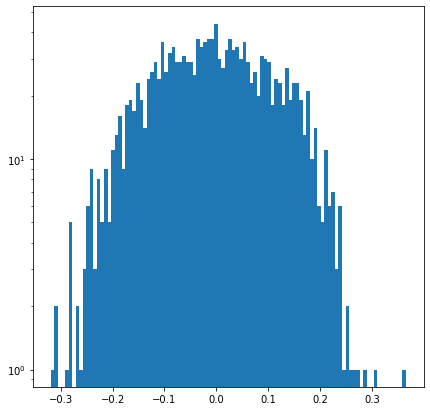

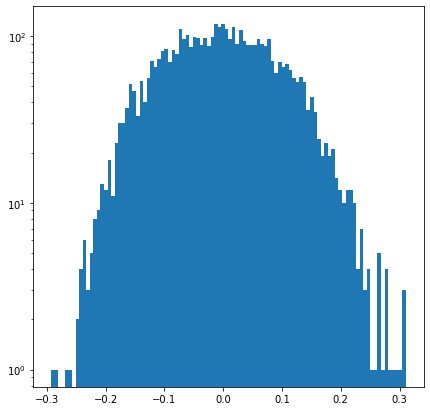

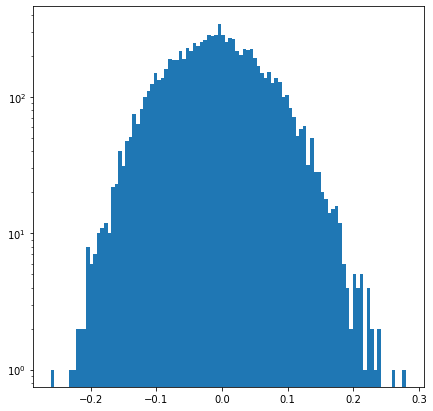

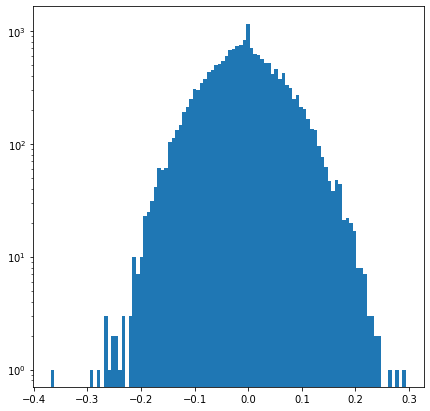

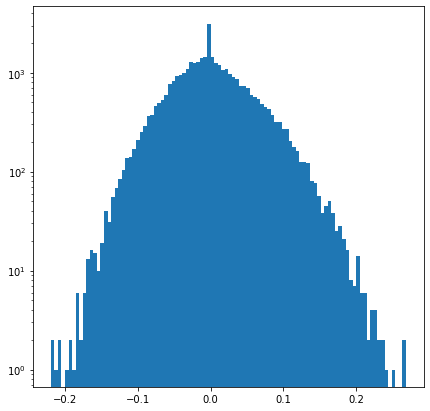

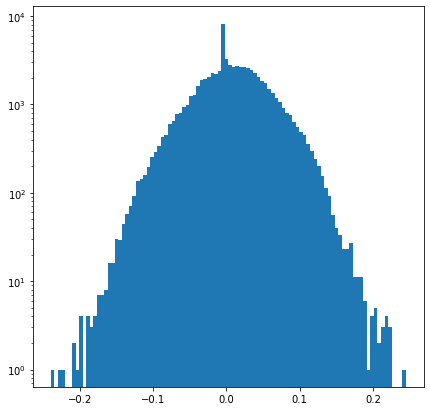

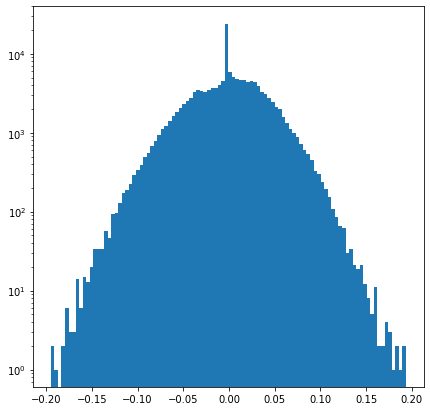

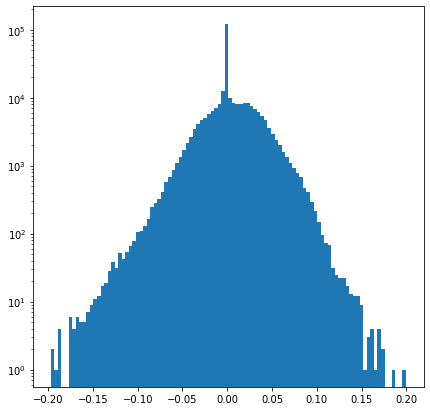

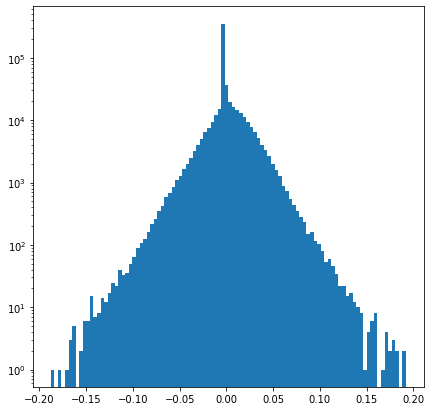

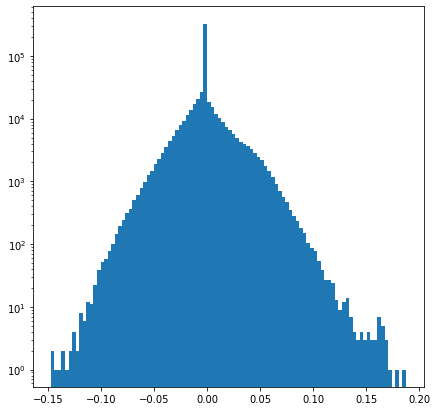

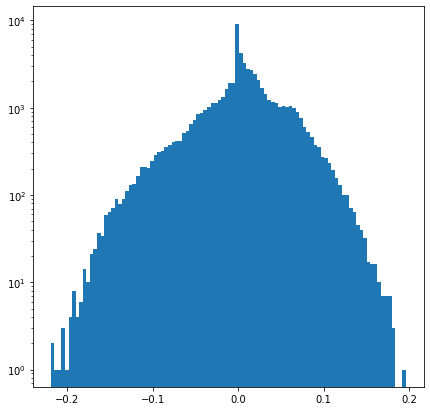

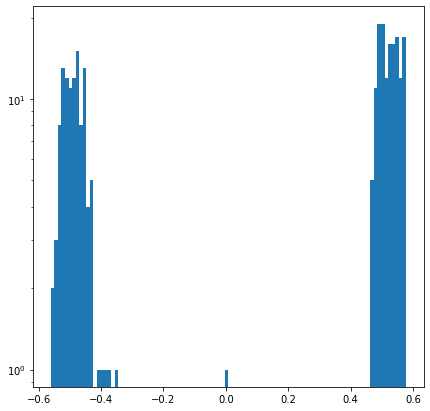

In [208]:
accum0 = 0
accum1 = 0
for layer in model.layers:
    if layer.__class__.__name__ in ['QConv2DBatchnorm', 'QDense']:
        w = layer.get_weights()[0]
        h, b = np.histogram(w, bins=100)
        plt.figure(figsize=(7,7))
        plt.bar(b[:-1], h, width=b[1]-b[0])
        plt.semilogy()
        x = np.sum(w==0)
        y = np.size(w)
        accum0 = accum0 + x
        accum1 = accum1 + y
        print('% of zeros = {}'.format(accum0/accum1))

In [209]:
from sklearn.metrics import r2_score, mean_absolute_error
#y_75 = model_75.predict(x_test_em_barrel)
y_unp = model.predict(x_test_em_barrel)

#print("Score 75% pruned: {}".format(mean_absolute_error(y_test_targets, y_75)))
#print("Score 30% pruned: {}".format(mean_absolute_error(y_test_targets, y_30)))
print("Score unpruned: {}".format(mean_absolute_error(y_test_targets, y_unp)))

Score unpruned: 14.29505443572998


In [217]:
import hls4ml
import plotting
#hls4ml.model.optimizer.OutputRoundingSaturationMode.layers = ['Activation']
#hls4ml.model.optimizer.OutputRoundingSaturationMode.rounding_mode = 'AP_RND'
hls4ml.model.optimizer.OutputRoundingSaturationMode.saturation_mode = 'AP_SAT'

config = hls4ml.utils.config_from_keras_model(model, granularity='name')
#config['LayerName']['softmax']['exp_table_t'] = 'ap_fixed<18,8>'
#config['LayerName']['softmax']['inv_table_t'] = 'ap_fixed<18,4>'
config['Model']['Strategy'] = 'Resource'
#config['Model']['Precision'] = 'ap_fixed<16,10>'
#config['LayerName']['conv2d_batchnorm_8']['Precision']['weight'] = 'ap_fixed<16,4>'
#config['LayerName']['conv2d_batchnorm_8']['Precision']['bias'] = 'ap_fixed<16,4>'
print("-----------------------------------")
plotting.print_dict(config)
print("-----------------------------------")
hls_model = hls4ml.converters.convert_from_keras_model(model,
                                                       hls_config=config,
                                                       io_type='io_stream',
                                                       output_dir='model_12/hls4ml_myprj',
                                                       part="xcvu9p-flgb2104-2-i")
                                                       #part='xcu250-figd2104-2L-e')
hls_model.compile()

Interpreting Model
Topology:
Layer name: em_barrel, layer type: Input
Layer name: up_sampling, layer type: UpSampling2D
Layer name: batch_norm, layer type: BatchNormalization
Layer name: conv2d_batchnorm, layer type: QConv2DBatchnorm
Layer name: leaky_relu, layer type: LeakyReLU
Layer name: max_pooling2D, layer type: MaxPooling2D
Layer name: conv2d_batchnorm_1, layer type: QConv2DBatchnorm
Layer name: leaky_relu_1, layer type: LeakyReLU
Layer name: conv2d_batchnorm_2, layer type: QConv2DBatchnorm
Layer name: leaky_relu_2, layer type: LeakyReLU
Layer name: max_pooling2D_1, layer type: MaxPooling2D
Layer name: conv2d_batchnorm_3, layer type: QConv2DBatchnorm
Layer name: leaky_relu_3, layer type: LeakyReLU
Layer name: conv2d_batchnorm_4, layer type: QConv2DBatchnorm
Layer name: leaky_relu_4, layer type: LeakyReLU
Layer name: max_pooling2D_2, layer type: MaxPooling2D
Layer name: conv2d_batchnorm_5, layer type: QConv2DBatchnorm
Layer name: leaky_relu_5, layer type: LeakyReLU
Layer name: con

Writing HLS project
Done


In [220]:
from sklearn.metrics import r2_score, mean_absolute_error
y_hls = hls_model.predict(x_test_em_barrel[:10])
y_unp = model.predict(x_test_em_barrel[:10])
print("Score hls: {}".format(mean_absolute_error(y_test_targets[:10], y_hls)))
print("Score keras: {}".format(mean_absolute_error(y_test_targets[:10], y_unp)))

Score unpruned: 75.88620719909667
Score unpruned: 11.490720748901367


Interpreting Model
Topology:
Layer name: em_barrel, layer type: InputLayer, input shapes: [[None, 56, 11, 4]], output shape: [None, 56, 11, 4]
Layer name: up_sampling, layer type: UpSampling2D, input shapes: [[None, 56, 11, 4]], output shape: [None, 56, 55, 4]
Layer name: batch_norm, layer type: BatchNormalization, input shapes: [[None, 56, 55, 4]], output shape: [None, 56, 55, 4]
Layer name: conv2d_batchnorm, layer type: QConv2DBatchnorm, input shapes: [[None, 56, 55, 4]], output shape: [None, 56, 55, 16]
Layer name: leaky_relu, layer type: LeakyReLU, input shapes: [[None, 56, 55, 16]], output shape: [None, 56, 55, 16]
Layer name: max_pooling2D, layer type: MaxPooling2D, input shapes: [[None, 56, 55, 16]], output shape: [None, 28, 27, 16]
Layer name: conv2d_batchnorm_1, layer type: QConv2DBatchnorm, input shapes: [[None, 28, 27, 16]], output shape: [None, 28, 27, 32]
Layer name: leaky_relu_1, layer type: LeakyReLU, input shapes: [[None, 28, 27, 32]], output shape: [None, 28, 27, 32]
L

(<Figure size 432x288 with 1 Axes>,
 <Figure size 432x288 with 1 Axes>,
 None,
 None)

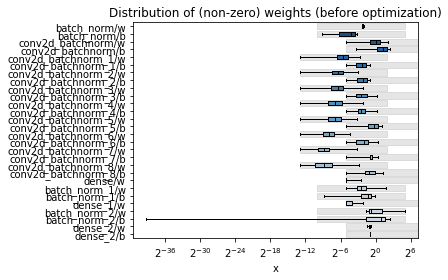

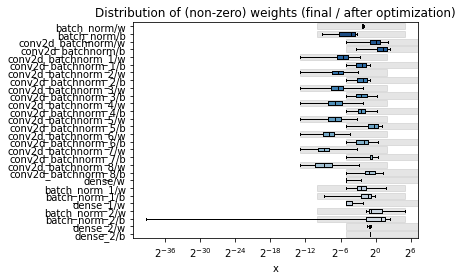

In [214]:
hls4ml.model.profiling.numerical(model=model, hls_model=hls_model)

In [216]:
print(y_hls[:100])
print(y_unp[:40])
#print(y_test_targets[:40])

[[ 0.        ]
 [21.46679688]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 5.8671875 ]
 [22.19042969]
 [ 0.        ]]
[[ 88.281525]
 [ 87.48941 ]
 [ 93.36873 ]
 [ 81.407074]
 [  0.      ]
 [ 55.942116]
 [ 27.957687]
 [ 92.65228 ]
 [133.10992 ]
 [ 56.06463 ]]


In [ ]:
#for layer in config['LayerName']:
config['LayerName']['activate']['Precision']= 'ap_fixed<18,8>'
config['LayerName']['dense_2']['Precision']['weight'] = 'ap_fixed<18,8>'
config['LayerName']['dense_2']['Precision']['bias'] = 'ap_fixed<18,8>'
config['LayerName']['leaky_relu_10']['Precision'] = 'ap_fixed<18,8>'
config['LayerName']['batch_norm_2']['Precision']['scale'] = 'ap_fixed<18,8>'
config['LayerName']['batch_norm_2']['Precision']['bias'] = 'ap_fixed<18,8>'
config['LayerName']['dense_1']['Precision']['weight'] = 'ap_fixed<18,8>'
config['LayerName']['leaky_relu_9']['Precision'] = 'ap_fixed<18,8>'
config['LayerName']['batch_norm_1']['Precision']['scale'] = 'ap_fixed<18,8>'
config['LayerName']['batch_norm_1']['Precision']['bias'] = 'ap_fixed<18,8>'
config['LayerName']['dense']['Precision']['weight'] = 'ap_fixed<18,8>'
config['LayerName']['em_barrel']['Precision']['result'] = 'ap_fixed<18,8>'
config['LayerName']['up_sampling']['Precision']['result'] = 'ap_fixed<18,8>'
config['LayerName']['up_sampling']['Precision']['weight'] = 'ap_fixed<18,8>'
config['LayerName']['up_sampling']['Precision']['bias'] = 'ap_fixed<18,8>'
config['LayerName']['batch_norm']['Precision']['scale'] = 'ap_fixed<18,8>'
config['LayerName']['batch_norm']['Precision']['bias'] = 'ap_fixed<18,8>'
config['LayerName']['conv2d_batchnorm']['Precision']['weight'] = 'ap_fixed<18,8>'
config['LayerName']['conv2d_batchnorm']['Precision']['bias'] = 'ap_fixed<18,8>'
config['LayerName']['leaky_relu']['Precision'] = 'ap_fixed<18,8>'
config['LayerName']['max_pooling2D']['Precision'] = 'ap_fixed<18,8>'

config['LayerName']['conv2d_batchnorm_1']['Precision']['weight'] = 'ap_fixed<18,8>'
config['LayerName']['conv2d_batchnorm_1']['Precision']['bias'] = 'ap_fixed<18,8>'
config['LayerName']['leaky_relu_1']['Precision'] = 'ap_fixed<18,8>'


In [187]:
for layer in config['LayerName']:
    print(layer)
    print(config['LayerName'][layer])

em_barrel
{'Precision': {'result': 'ap_fixed<16,6>'}}
up_sampling
{'Precision': {'weight': 'ap_fixed<16,6>', 'bias': 'ap_fixed<16,6>', 'result': 'ap_fixed<16,6>'}, 'ReuseFactor': 1}
batch_norm
{'Precision': {'scale': 'ap_fixed<16,6>', 'bias': 'ap_fixed<16,6>'}, 'ReuseFactor': 1}
conv2d_batchnorm
{'Precision': {'weight': 'ap_fixed<16,11>', 'bias': 'ap_fixed<16,11>'}, 'ReuseFactor': 1}
leaky_relu
{'Precision': 'ap_fixed<16,6>', 'ReuseFactor': 1, 'table_size': 1024, 'table_t': 'ap_fixed<18,8>'}
max_pooling2D
{'Precision': 'ap_fixed<16,6>'}
conv2d_batchnorm_1
{'Precision': {'weight': 'ap_fixed<16,11>', 'bias': 'ap_fixed<16,11>'}, 'ReuseFactor': 1}
leaky_relu_1
{'Precision': 'ap_fixed<16,6>', 'ReuseFactor': 1, 'table_size': 1024, 'table_t': 'ap_fixed<18,8>'}
conv2d_batchnorm_2
{'Precision': {'weight': 'ap_fixed<16,11>', 'bias': 'ap_fixed<16,11>'}, 'ReuseFactor': 1}
leaky_relu_2
{'Precision': 'ap_fixed<16,6>', 'ReuseFactor': 1, 'table_size': 1024, 'table_t': 'ap_fixed<18,8>'}
max_pooling2D_1